In [1]:
from scipy.fft import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def fft_cd(sinal, frequencia, taxa_amostragem, threshold):

    # Análise Espectral
    fft = np.fft.fft(sinal)
    frequencias = np.fft.fftfreq(len(sinal), d=1 / taxa_amostragem)
    espectro_magnitude = np.abs(fft)
    
    # Divisão em janelas para detectar amplitude
    periodo = 1 / frequencia  # Período do sinal
    tamanho_janela = int(periodo * taxa_amostragem)  # Tamanho da janela em amostras
    #if tamanho_janela < 1:
    #    raise ValueError("Tamanho da janela deve ser maior ou igual a 1. Ajuste a frequência ou a taxa de amostragem.")

    amplitudes = [
        sinal[i:i + tamanho_janela].max() - sinal[i:i + tamanho_janela].min()
        for i in range(0, len(sinal) - tamanho_janela + 1, tamanho_janela)
    ]
    
    # Detectar mudanças bruscas na amplitude com np.gradient
    gradientes = np.gradient(amplitudes)
    tempo_janelas = np.arange(len(amplitudes)) * periodo  # Tempo correspondente às janelas

    # Calcular diferenças entre amplitudes consecutivas
    diferencas = np.abs(np.diff(amplitudes))

    # Calcular threshold absoluto baseado no percentual
    max_amplitude = np.maximum(amplitudes[:-1], amplitudes[1:])
    threshold = (threshold / 100) * max_amplitude

    # Identificar índices de mudanças bruscas
    indices_cd = np.where(diferencas > threshold)[0]

    # Visualização do Sinal e Mudanças Detectadas
    t = np.arange(len(sinal)) / taxa_amostragem
    plt.figure(figsize=(12, 6))

    # Sinal Temporal
    plt.plot(t, sinal)
    for i in indices_cd:
        plt.axvline(tempo_janelas[i + 1], color="r", linestyle="--", label="Concept Drift Detection" if i == indices_cd[0] else None)

    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Retornar índices das mudanças detectadas
    return indices_cd


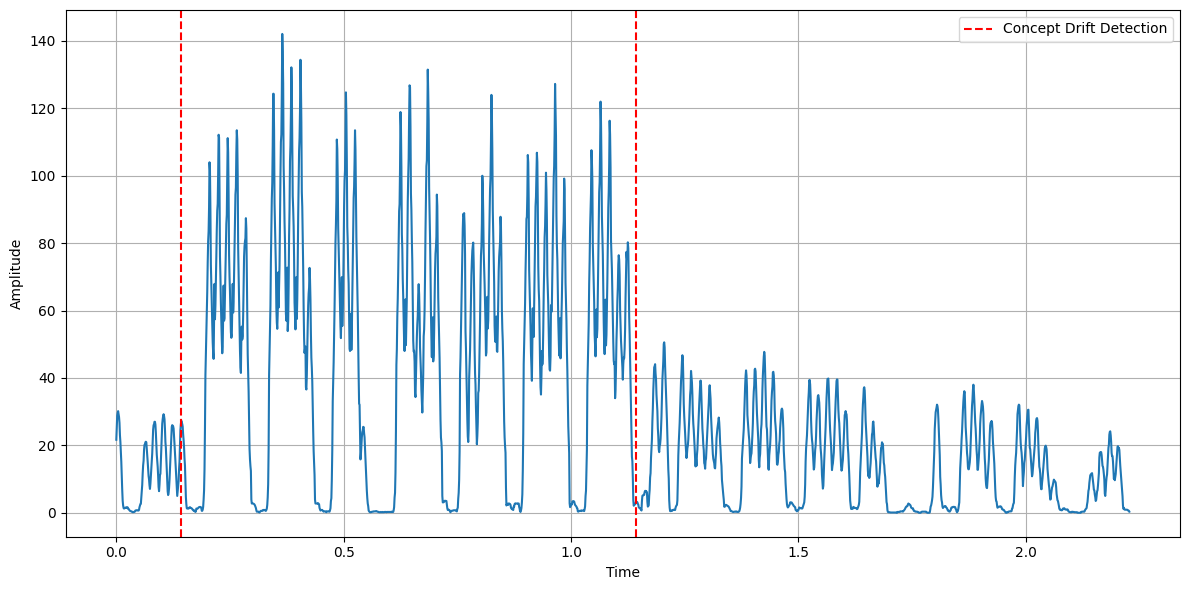

In [3]:
y = pd.read_csv("df_node_canela_.csv")["sobe"]
y = pd.read_csv("df_node_canela_.csv")["media_movel"]
amp, tj = fft_cd(y, 7, 1000, 50)